In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Arc

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
import matplotlib.pyplot as plt
import numpy as np


def create_ellipse_arc(center_x, center_y, semi_major_axis, semi_minor_axis, rotation_angle, start_angle, end_angle):
    # Generate theta values from start_angle to end_angle
    theta = np.linspace(start_angle, end_angle, 1000)

    # Compute the x and y coordinates of the arc
    x = center_x + semi_major_axis * np.cos(theta) * np.cos(rotation_angle) - semi_minor_axis * np.sin(theta) * np.sin(rotation_angle)
    y = center_y + semi_major_axis * np.cos(theta) * np.sin(rotation_angle) + semi_minor_axis * np.sin(theta) * np.cos(rotation_angle)

    return x, y

In [ ]:
def inside_fifty_intersesct(goal_x, goal_y, boundary_x, boundary_y):
    
    distance_to_50 = 100
    for x, y in zip(boundary_x, boundary_y):
        x_diff = goal_x - x
        y_diff = goal_y - y
        
        new_distance_to_50 = abs((x_diff**2 + y_diff**2)**0.5 - 50)

        if new_distance_to_50 < distance_to_50:
            distance_to_50 = new_distance_to_50
            intersect_x, intersect_y = x, y
    
    return intersect_x, intersect_y

In [ ]:
def get_fifty_angle(goal_x, goal_y, intersect_x, intersect_y):
    
    return np.arctan((intersect_y - goal_y) / (intersect_x - goal_x))

In [150]:
def plot_horizontal_pitch(pitch_length, pitch_width, half = False):
    
    line_colour = "grey"
    
    goal_width = 6.4
    behind_width = 6.4
    goal_post_length = 15
    behind_post_length = 10
    centre_square = 50
    goal_square_length = 9
    
    left_goal_x = -pitch_length/2
    left_goal_y = 0

    right_goal_x = pitch_length/2
    right_goal_y = 0

    
    fig=plt.figure(figsize=(12, 8))
    ax=fig.add_subplot(1,1,1)

    # Left Goal
    plt.plot([left_goal_x, left_goal_x], [ -goal_width/2, goal_width/2], color = line_colour)
    plt.plot([left_goal_x, (left_goal_x) - goal_post_length], [-goal_width/2, -goal_width/2], color = line_colour)
    plt.plot([left_goal_x, (left_goal_x) - goal_post_length], [goal_width/2, goal_width/2], color = line_colour)

    # Left Behinds
    plt.plot([left_goal_x, left_goal_x], [ -goal_width/2, -behind_width-goal_width/2], color = line_colour)
    plt.plot([left_goal_x, left_goal_x], [ goal_width/2, behind_width+goal_width/2], color = line_colour)
    plt.plot([left_goal_x, (left_goal_x)- behind_post_length], [behind_width+goal_width/2, behind_width+goal_width/2], color = line_colour)
    plt.plot([left_goal_x, (left_goal_x)- behind_post_length], [-behind_width-goal_width/2, -behind_width-goal_width/2], color = line_colour)

    # Right Goal
    plt.plot([right_goal_x, right_goal_x], [ -goal_width/2, goal_width/2], color = line_colour)
    plt.plot([right_goal_x, (right_goal_x) + goal_post_length], [-goal_width/2, -goal_width/2], color = line_colour)
    plt.plot([right_goal_x, (right_goal_x) + goal_post_length], [goal_width/2, goal_width/2], color = line_colour)

    # Right Behinds
    plt.plot([right_goal_x, right_goal_x], [ -behind_width/2, -behind_width-goal_width/2], color = line_colour)
    plt.plot([right_goal_x, right_goal_x], [ behind_width/2, behind_width+goal_width/2], color = line_colour)
    plt.plot([right_goal_x, (right_goal_x)+ behind_post_length], [behind_width+6.4/2, behind_width+goal_width/2], color = line_colour)
    plt.plot([right_goal_x, (right_goal_x)+ behind_post_length], [-behind_width-6.4/2, -behind_width-goal_width/2], color = line_colour)

    # plt.plot([10,20],[30,40])
    # 50m centre
    plt.plot([-centre_square/2,-centre_square/2],[-centre_square/2,centre_square/2], color=line_colour)
    plt.plot([-centre_square/2,centre_square/2],[centre_square/2,centre_square/2], color=line_colour)
    plt.plot([centre_square/2,centre_square/2],[centre_square/2,-centre_square/2], color=line_colour)
    plt.plot([centre_square/2,-centre_square/2],[-centre_square/2,-centre_square/2], color=line_colour)

    # Top Boundary
    top_x,top_y = create_ellipse_arc(center_x = 0, center_y = behind_width + goal_width/2, 
                                    semi_major_axis = pitch_length/2, semi_minor_axis = pitch_width/2, 
                                    rotation_angle = 0, 
                                    start_angle=0, end_angle=np.pi)
    plt.plot(top_x, top_y, color = line_colour)

    # Bottom Boundary    
    bottom_x,bottom_y = create_ellipse_arc(center_x = 0, center_y = - behind_width - goal_width/2, 
                                           semi_major_axis = pitch_length/2, semi_minor_axis = pitch_width/2, 
                                           rotation_angle = 0, 
                                           start_angle=np.pi, end_angle=2*np.pi)
    plt.plot(bottom_x, bottom_y, color = line_colour)
    
    # Left Inside 50
    left_50_top_x, left_50_top_y = inside_fifty_intersesct(left_goal_x, left_goal_y, top_x, top_y)
    left_50_bottom_x, left_50_bottom_y = inside_fifty_intersesct(left_goal_x, left_goal_y, bottom_x, bottom_y)

    left_50_top_angle = get_fifty_angle(left_goal_x, left_goal_y, left_50_top_x, left_50_top_y)
    left_50_bottom_angle = get_fifty_angle(left_goal_x, left_goal_y, left_50_bottom_x, left_50_bottom_y)

    left_50_x, left_50_y = create_ellipse_arc(center_x = left_goal_x, center_y = 0, 
                                    semi_major_axis = 50, semi_minor_axis = 50, 
                                    rotation_angle = 0, 
                                    start_angle=left_50_top_angle, end_angle=left_50_bottom_angle)
    plt.plot(left_50_x, left_50_y, color = line_colour)

    # Right Inside 50
    right_50_top_x, right_50_top_y = inside_fifty_intersesct(right_goal_x, right_goal_y, top_x, top_y)
    right_50_bottom_x, right_50_bottom_y = inside_fifty_intersesct(right_goal_x, right_goal_y, bottom_x, bottom_y)

    right_50_top_angle = get_fifty_angle(right_goal_x, right_goal_y, right_50_top_x, right_50_top_y)
    right_50_bottom_angle = get_fifty_angle(right_goal_x, right_goal_y, right_50_bottom_x, right_50_bottom_y)

    right_50_x, right_50_y = create_ellipse_arc(center_x = right_goal_x, center_y = 0, 
                                    semi_major_axis = 50, semi_minor_axis = 50, 
                                    rotation_angle = 0, 
                                    start_angle=np.pi - right_50_bottom_angle, end_angle=np.pi - right_50_top_angle)
    plt.plot(right_50_x, right_50_y, color = line_colour)
    
    # Left Goal Square
    plt.plot([left_goal_x, left_goal_x + goal_square_length], [goal_width/2, goal_width/2], color = line_colour)
    plt.plot([left_goal_x, left_goal_x + goal_square_length], [-goal_width/2, -goal_width/2], color = line_colour)
    plt.plot([left_goal_x + goal_square_length, left_goal_x + goal_square_length], [goal_width/2, -goal_width/2], color = line_colour)
    
    # Right Goal Square
    plt.plot([right_goal_x, right_goal_x - goal_square_length], [goal_width/2, goal_width/2], color = line_colour)
    plt.plot([right_goal_x, right_goal_x - goal_square_length], [-goal_width/2, -goal_width/2], color = line_colour)
    plt.plot([right_goal_x - goal_square_length, right_goal_x - goal_square_length], [goal_width/2, -goal_width/2], color = line_colour)
    
    plt.xlim(-100,100)
    plt.ylim(-100,100)
    
    if half:
        fig_width = fig.get_figwidth()
        fig.set_figwidth(fig_width/2)
        plt.xlim(-10, 100)
    
    plt.axis("off")

    return fig, ax

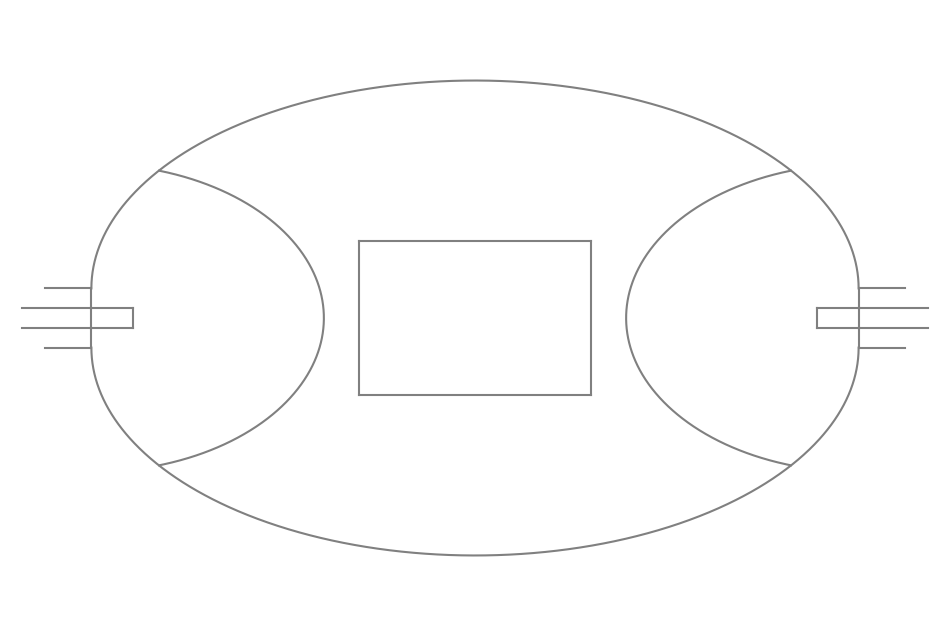

In [151]:
fig, ax = plot_horizontal_pitch(165, 135)

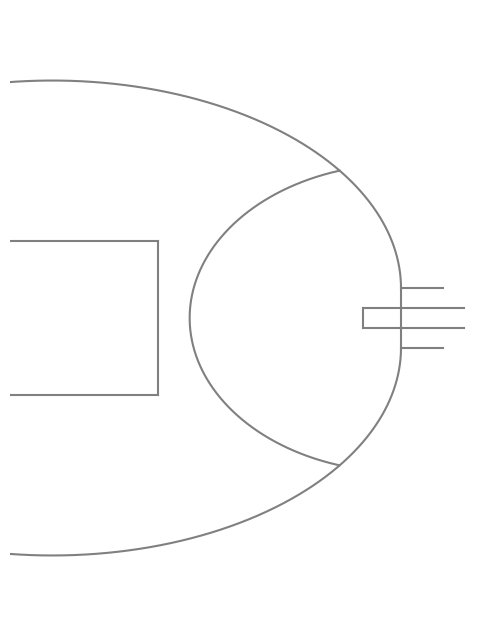

In [152]:
fig, ax = plot_horizontal_pitch(165, 135, half= True)

In [153]:
def plot_vertical_pitch(pitch_length, pitch_width, half = False):
    
    line_colour = "grey"
    
    goal_width = 6.4
    behind_width = 6.4
    goal_post_length = 15
    behind_post_length = 10
    centre_square = 50
    goal_square_length = 9
    
    left_goal_x = -pitch_length/2
    left_goal_y = 0

    right_goal_x = pitch_length/2
    right_goal_y = 0

    
    fig=plt.figure(figsize=(8, 12))
    ax=fig.add_subplot(1,1,1)

    # Left Goal
    plt.plot([ -goal_width/2, goal_width/2], [left_goal_x, left_goal_x], color = line_colour)
    plt.plot([-goal_width/2, -goal_width/2], [left_goal_x, (left_goal_x) - goal_post_length], color = line_colour)
    plt.plot([goal_width/2, goal_width/2], [left_goal_x, (left_goal_x) - goal_post_length], color = line_colour)

    # Left Behinds
    plt.plot([ -goal_width/2, -behind_width-goal_width/2], [left_goal_x, left_goal_x], color = line_colour)
    plt.plot([ goal_width/2, behind_width+goal_width/2], [left_goal_x, left_goal_x], color = line_colour)
    plt.plot([behind_width+goal_width/2, behind_width+goal_width/2], [left_goal_x, (left_goal_x)- behind_post_length], color = line_colour)
    plt.plot([-behind_width-goal_width/2, -behind_width-goal_width/2], [left_goal_x, (left_goal_x)- behind_post_length], color = line_colour)

    # Right Goal
    plt.plot([ -goal_width/2, goal_width/2], [right_goal_x, right_goal_x], color = line_colour)
    plt.plot([-goal_width/2, -goal_width/2], [right_goal_x, (right_goal_x) + goal_post_length], color = line_colour)
    plt.plot([goal_width/2, goal_width/2], [right_goal_x, (right_goal_x) + goal_post_length], color = line_colour)

    # Right Behinds
    plt.plot([ -behind_width/2, -behind_width-goal_width/2], [right_goal_x, right_goal_x], color = line_colour)
    plt.plot([ behind_width/2, behind_width+goal_width/2], [right_goal_x, right_goal_x], color = line_colour)
    plt.plot([behind_width+6.4/2, behind_width+goal_width/2], [right_goal_x, (right_goal_x)+ behind_post_length], color = line_colour)
    plt.plot([-behind_width-6.4/2, -behind_width-goal_width/2], [right_goal_x, (right_goal_x)+ behind_post_length], color = line_colour)

    # 50m centre
    plt.plot([-centre_square/2,-centre_square/2],[-centre_square/2,centre_square/2], color=line_colour)
    plt.plot([-centre_square/2,centre_square/2],[centre_square/2,centre_square/2], color=line_colour)
    plt.plot([centre_square/2,centre_square/2],[centre_square/2,-centre_square/2], color=line_colour)
    plt.plot([centre_square/2,-centre_square/2],[-centre_square/2,-centre_square/2], color=line_colour)

    # Top Boundary
    top_x,top_y = create_ellipse_arc(center_x = 0, center_y = behind_width + goal_width/2, 
                                    semi_major_axis = pitch_length/2, semi_minor_axis = pitch_width/2, 
                                    rotation_angle = 0, 
                                    start_angle=0, end_angle=np.pi)
    plt.plot(top_y, top_x, color = line_colour)

    # Bottom Boundary    
    bottom_x,bottom_y = create_ellipse_arc(center_x = 0, center_y = - behind_width - goal_width/2, 
                                           semi_major_axis = pitch_length/2, semi_minor_axis = pitch_width/2, 
                                           rotation_angle = 0, 
                                           start_angle=np.pi, end_angle=2*np.pi)
    plt.plot(bottom_y, bottom_x, color = line_colour)
    
    # Left Inside 50
    left_50_top_x, left_50_top_y = inside_fifty_intersesct(left_goal_x, left_goal_y, top_x, top_y)
    left_50_bottom_x, left_50_bottom_y = inside_fifty_intersesct(left_goal_x, left_goal_y, bottom_x, bottom_y)

    left_50_top_angle = get_fifty_angle(left_goal_x, left_goal_y, left_50_top_x, left_50_top_y)
    left_50_bottom_angle = get_fifty_angle(left_goal_x, left_goal_y, left_50_bottom_x, left_50_bottom_y)

    left_50_x, left_50_y = create_ellipse_arc(center_x = left_goal_x, center_y = 0, 
                                    semi_major_axis = 50, semi_minor_axis = 50, 
                                    rotation_angle = 0, 
                                    start_angle=left_50_top_angle, end_angle=left_50_bottom_angle)
    plt.plot(left_50_y, left_50_x, color = line_colour)

    # Right Inside 50
    right_50_top_x, right_50_top_y = inside_fifty_intersesct(right_goal_x, right_goal_y, top_x, top_y)
    right_50_bottom_x, right_50_bottom_y = inside_fifty_intersesct(right_goal_x, right_goal_y, bottom_x, bottom_y)

    right_50_top_angle = get_fifty_angle(right_goal_x, right_goal_y, right_50_top_x, right_50_top_y)
    right_50_bottom_angle = get_fifty_angle(right_goal_x, right_goal_y, right_50_bottom_x, right_50_bottom_y)

    right_50_x, right_50_y = create_ellipse_arc(center_x = right_goal_x, center_y = 0, 
                                    semi_major_axis = 50, semi_minor_axis = 50, 
                                    rotation_angle = 0, 
                                    start_angle=np.pi - right_50_bottom_angle, end_angle=np.pi - right_50_top_angle)
    plt.plot(right_50_y, right_50_x, color = line_colour)
    
    # Left Goal Square
    plt.plot([goal_width/2, goal_width/2], [left_goal_x, left_goal_x + goal_square_length], color = line_colour)
    plt.plot([-goal_width/2, -goal_width/2], [left_goal_x, left_goal_x + goal_square_length], color = line_colour)
    plt.plot([goal_width/2, -goal_width/2], [left_goal_x + goal_square_length, left_goal_x + goal_square_length], color = line_colour)
    
    # Right Goal Square
    plt.plot([goal_width/2, goal_width/2], [right_goal_x, right_goal_x - goal_square_length], color = line_colour)
    plt.plot([-goal_width/2, -goal_width/2], [right_goal_x, right_goal_x - goal_square_length], color = line_colour)
    plt.plot([goal_width/2, -goal_width/2], [right_goal_x - goal_square_length, right_goal_x - goal_square_length], color = line_colour)
    
    plt.xlim(-100,100)
    plt.ylim(-100,100)
    
    if half:
        fig_height = fig.get_figheight()
        fig.set_figheight(fig_height/2)
        plt.ylim(-10, 100)
    
    plt.axis("off")

    return fig, ax

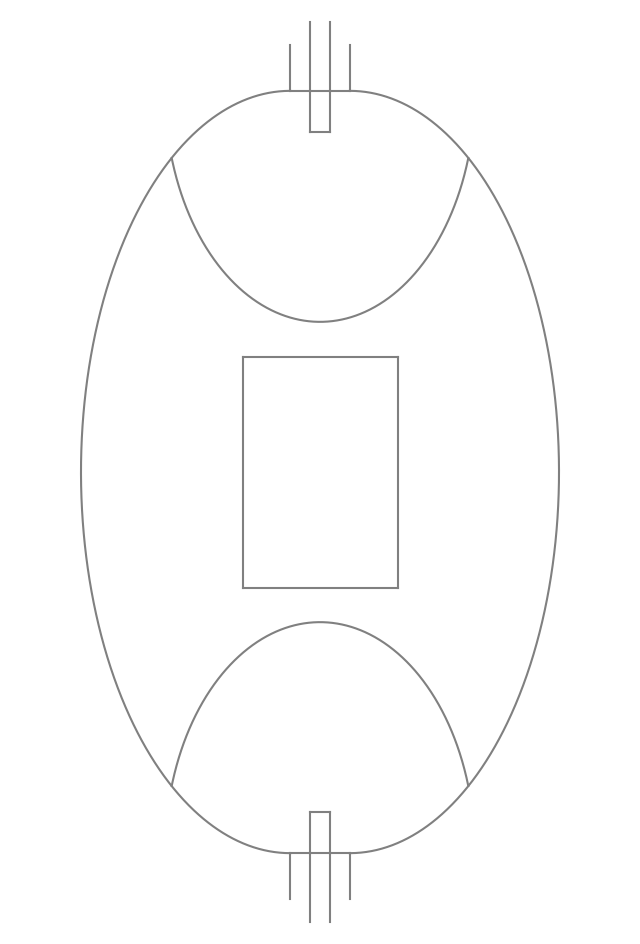

In [154]:
fig, ax = plot_vertical_pitch(165, 135)

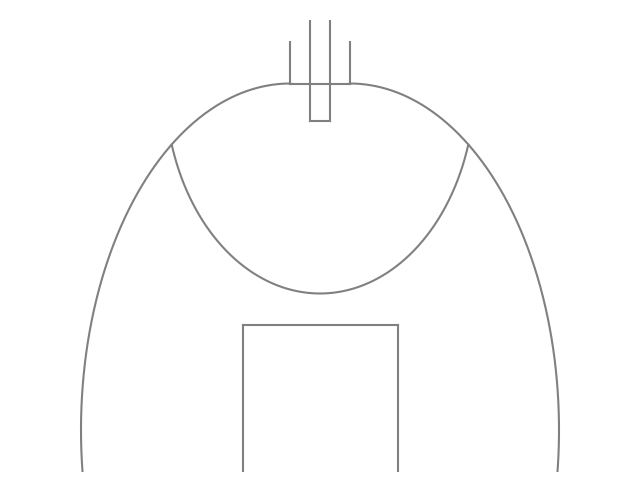

In [155]:
fig, ax = plot_vertical_pitch(165, 135, half = True)